<a href="https://colab.research.google.com/github/adeeeehidayat/diabetes-health-indicators-dataset/blob/main/Copy_of_DHID_012_BRFSS_2015_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pemuatan Data

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [2]:
import pandas as pd

# URL file CSV di GitHub
url = 'https://raw.githubusercontent.com/adeeeehidayat/diabetes-health-indicators-dataset/main/diabetes_012_health_indicators_BRFSS2015.csv'

# Memuat data ke dalam DataFrame
df = pd.read_csv(url)

print(df.head(10))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.

# Pre processing

## Hapus Data Duplikat

In [3]:
duplicates = df[df.duplicated()]
print(f"Jumlah duplikasi: {duplicates.shape[0]}")
print("\nBaris duplikat:")
print(duplicates)

# menghapus duplikasi dan hanya menyimpan baris unik
df = df.drop_duplicates()

# Memastikan duplikasi sudah dihapus
print(f"Jumlah baris setelah menghapus duplikasi: {df.shape[0]}")

Jumlah duplikasi: 23899

Baris duplikat:
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242             2.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563             0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700             0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160             0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332             0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  A

## Menggabungkan kelas target 1 dan 2 menjadi (1 dan 0)

In [4]:
# Mengubah nama kolom 'Diabetes_012' menjadi 'Diabetes'
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)

# Mengelompokkan nilai 1 dan 2 menjadi 1 (terkena penyakit)
df['Diabetes'] = df['Diabetes'].apply(lambda x: 1.0 if x in [1, 2] else 0.0)

<ipython-input-4-beebe522bce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)


# EDA

## Dimensi dan data awal

In [5]:
# Melihat dimensi dan data awal
print(df.shape)
print(df.head())

(229781, 22)
   Diabetes  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0       0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1       0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2       0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3       0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4       0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0   

## Distribusi Target

Kelas 0: 190055 instances (82.71%)
Kelas 1: 39726 instances (17.29%)


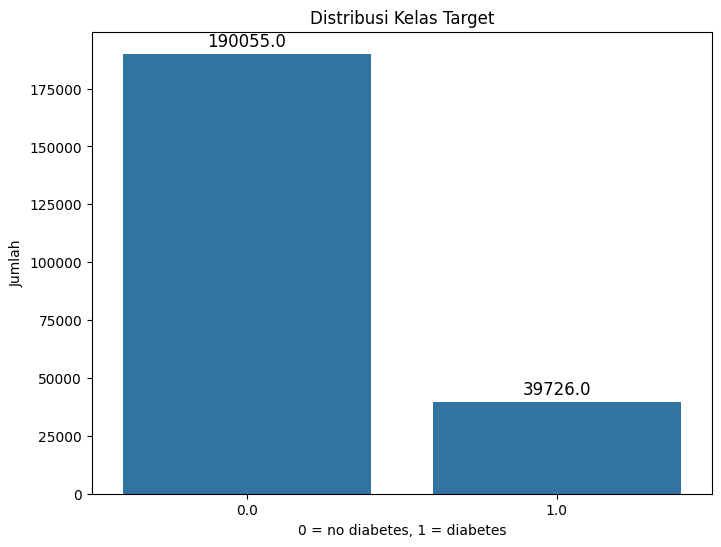

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes', data=df)
plt.title('Distribusi Kelas Target')
plt.xlabel('0 = no diabetes, 1 = diabetes')
plt.ylabel('Jumlah')

# Menghitung jumlah dan proporsi masing-masing kelas
class_counts = df['Diabetes'].value_counts()
total_instances = len(df)
print(f"Kelas 0: {class_counts[0]} instances ({(class_counts[0] / total_instances) * 100:.2f}%)")
print(f"Kelas 1: {class_counts[1]} instances ({(class_counts[1] / total_instances) * 100:.2f}%)")

# Menambahkan jumlah data di atas tiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


## Heatmap korelasi

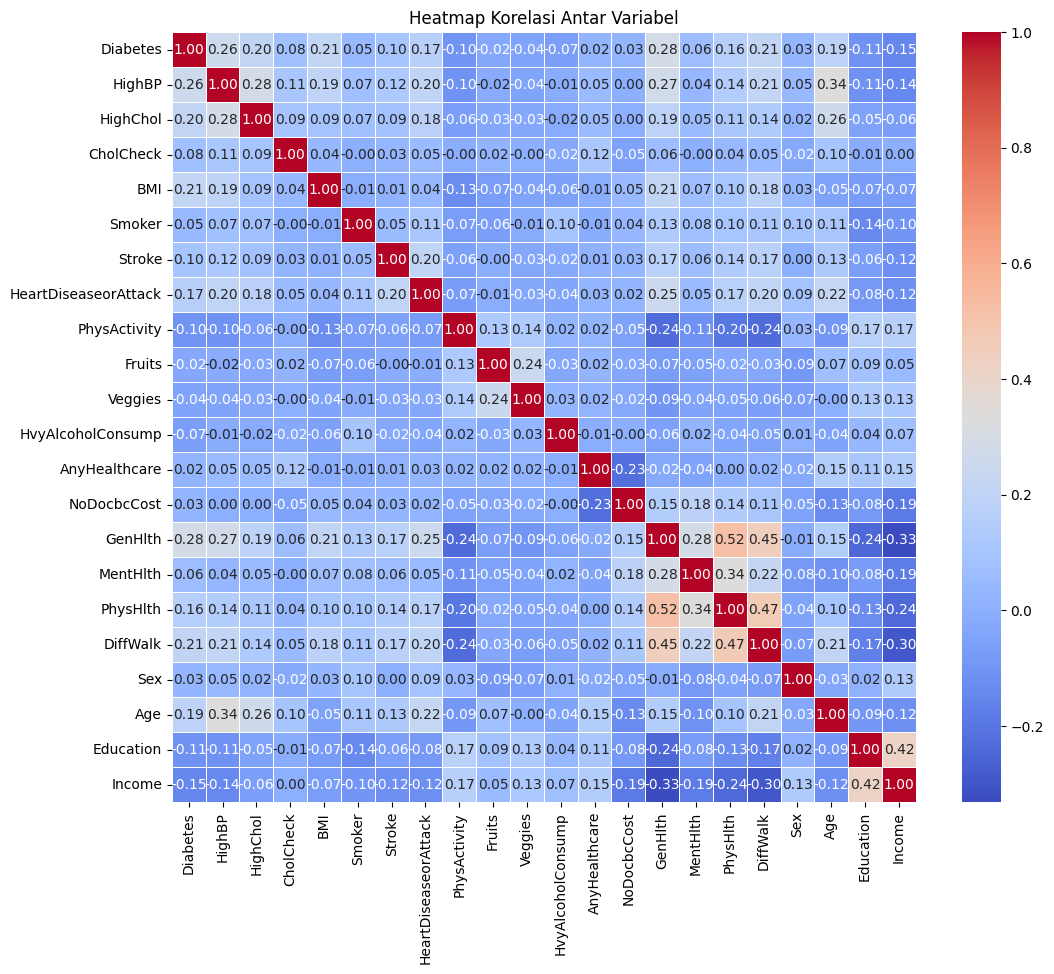

Korelasi dengan variabel target (Diabetes):

Diabetes                1.000000
GenHlth                 0.282328
HighBP                  0.260346
BMI                     0.211155
DiffWalk                0.208126
HighChol                0.204418
Age                     0.185479
HeartDiseaseorAttack    0.167184
PhysHlth                0.158697
Stroke                  0.097685
CholCheck               0.076190
MentHlth                0.058826
Smoker                  0.046262
Sex                     0.030797
NoDocbcCost             0.025940
AnyHealthcare           0.023756
Fruits                 -0.024968
Veggies                -0.043339
HvyAlcoholConsump      -0.066111
PhysActivity           -0.102391
Education              -0.108504
Income                 -0.147809
Name: Diabetes, dtype: float64

Top 3 Variabel dengan Korelasi Positif Tertinggi terhadap Diabetes:
GenHlth    0.282328
HighBP     0.260346
BMI        0.211155
Name: Diabetes, dtype: float64

Top 3 Variabel dengan Korelasi Negati

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Korelasi dengan target (Diabetes)
correlation_with_target = correlation_matrix['Diabetes'].sort_values(ascending=False)
print("Korelasi dengan variabel target (Diabetes):\n")
print(correlation_with_target)

# Variabel dengan korelasi tertinggi (positif dan negatif)
top_positive_corr = correlation_with_target[1:4]  # Skip target sendiri, ambil top 3 positif
top_negative_corr = correlation_with_target[-3:]  # Ambil top 3 negatif
print("\nTop 3 Variabel dengan Korelasi Positif Tertinggi terhadap Diabetes:")
print(top_positive_corr)

print("\nTop 3 Variabel dengan Korelasi Negatif Tertinggi terhadap Diabetes:")
print(top_negative_corr)

# Split Data & Normalisasi

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur data latih dan uji menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Uji Model

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Membuat model RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train_scaled, y_train)

# Melakukan prediksi dengan data testing
rf_pred = rf_model.predict(X_test_scaled)

# Menghitung precision, recall, dan F1-score
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix)

# Menghitung specificity
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
rf_specificity = TN / (TN + FP)

# Menghitung akurasi
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\nAkurasi Random Forest: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Specificity: {rf_specificity:.4f}")

# Menampilkan classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

Confusion Matrix (Random Forest):
[[36340  1776]
 [ 6249  1592]]

Akurasi Random Forest: 0.8254
Precision: 0.4727
Recall: 0.2030
F1-Score: 0.2841
Specificity: 0.9534

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38116
         1.0       0.47      0.20      0.28      7841

    accuracy                           0.83     45957
   macro avg       0.66      0.58      0.59     45957
weighted avg       0.79      0.83      0.80     45957



## XGBoost

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Membuat model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Melatih model dengan data training
xgb_model.fit(X_train_scaled, y_train)

# Melakukan prediksi dengan data testing
xgb_pred = xgb_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix (XGBoost):")
print(conf_matrix)

# Menghitung precision, recall, dan F1-score
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Menghitung specificity
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
xgb_specificity = TN / (TN + FP)

# Menghitung akurasi
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"\nAkurasi XGBoost: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"Specificity: {xgb_specificity:.4f}")

# Menampilkan classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, xgb_pred))

Confusion Matrix (XGBoost):
[[36806  1310]
 [ 6208  1633]]

Akurasi XGBoost: 0.8364
Precision: 0.5549
Recall: 0.2083
F1-Score: 0.3029
Specificity: 0.9656

Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     38116
         1.0       0.55      0.21      0.30      7841

    accuracy                           0.84     45957
   macro avg       0.71      0.59      0.61     45957
weighted avg       0.80      0.84      0.80     45957



## Stacking

In [11]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Definisi base model dengan dua parameter tambahan masing-masing
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42))
]

# Definisi meta model
meta_model = LogisticRegression()

# Definisi StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Melatih model
stacking_model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Evaluasi model Stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)

# Confusion matrix Stacking
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
tn, fp, fn, tp = cm_stacking.ravel()

# Calculate specificity
specificity_stacking = tn / (tn + fp)

# Print evaluasi Stacking dengan 6 digit desimal
print("\nEvaluasi Model Stacking:")
print(f"Akurasi     : {accuracy_stacking:.6f}")
print(f"Precision   : {precision_stacking:.6f}")
print(f"Recall      : {recall_stacking:.6f}")
print(f"F1-score    : {f1_stacking:.6f}")
print(f"Specificity : {specificity_stacking:.6f}")

# Classification report Stacking
print("\nClassification Report Stacking:")
print(classification_report(y_test, y_pred_stacking))

# Confusion matrix Stacking
print("\nConfusion Matrix Stacking:")
print(cm_stacking)


Evaluasi Model Stacking:
Akurasi     : 0.835977
Precision   : 0.548824
Recall      : 0.217192
F1-score    : 0.311221
Specificity : 0.963270

Classification Report Stacking:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38116
         1.0       0.55      0.22      0.31      7841

    accuracy                           0.84     45957
   macro avg       0.70      0.59      0.61     45957
weighted avg       0.80      0.84      0.81     45957


Confusion Matrix Stacking:
[[36716  1400]
 [ 6138  1703]]


# Model + SMOTE

## Oversampling SMOTE

Jumlah data setelah oversampling: 303878


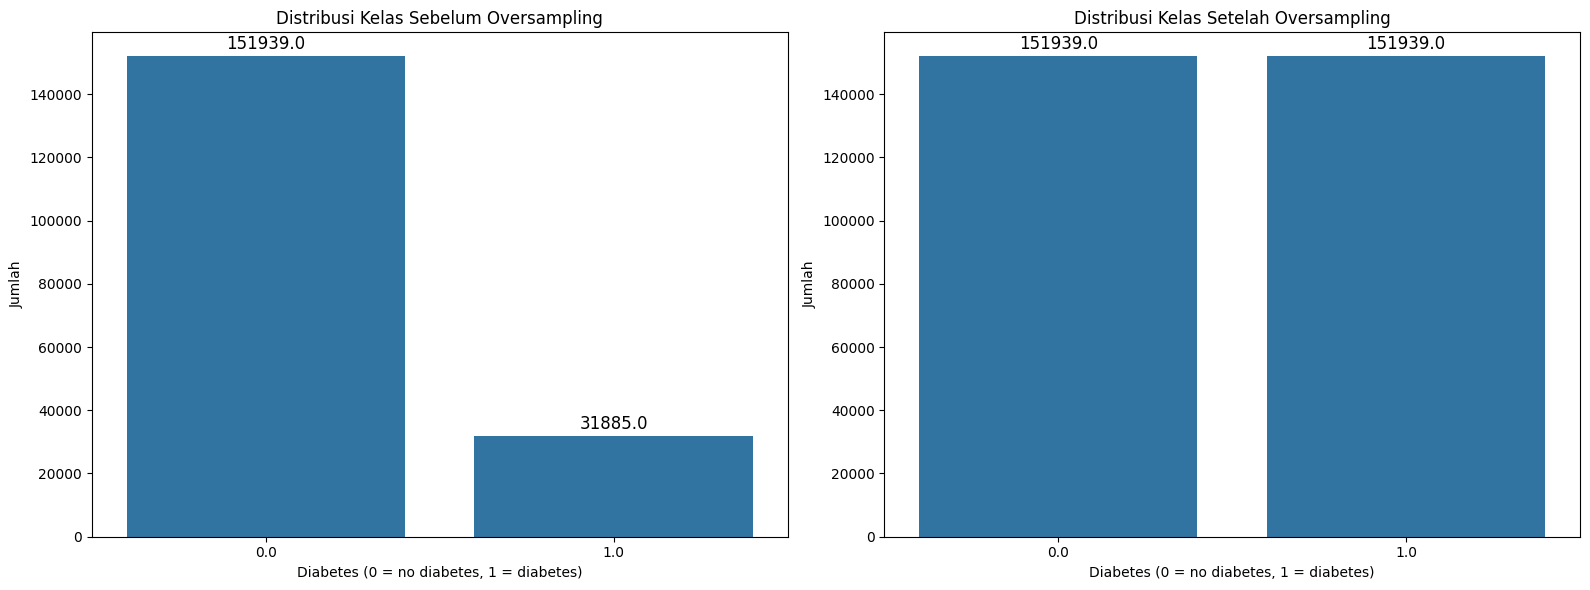

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Membuat figure dan axes untuk menampilkan dua plot dalam satu gambar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Menampilkan distribusi kelas sebelum oversampling pada subplot pertama
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribusi Kelas Sebelum Oversampling')
axes[0].set_xlabel('Diabetes (0 = no diabetes, 1 = diabetes)')
axes[0].set_ylabel('Jumlah')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Melakukan oversampling pada data training
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Jumlah data setelah oversampling: {X_train_smote.shape[0]}")

# Menampilkan distribusi kelas setelah oversampling pada subplot kedua
sns.countplot(x=y_train_smote, ax=axes[1])
axes[1].set_title('Distribusi Kelas Setelah Oversampling')
axes[1].set_xlabel('Diabetes (0 = no diabetes, 1 = diabetes)')
axes[1].set_ylabel('Jumlah')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Menampilkan gambar
plt.tight_layout()
plt.show()

## Random Forest + SMOTE

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Membuat model RandomForest
rf_model_smote = RandomForestClassifier(random_state=42)

# Melatih model dengan data training yang sudah di-oversampling
rf_model_smote.fit(X_train_smote, y_train_smote)

# Melakukan prediksi dengan data testing
rf_pred_smote = rf_model_smote.predict(X_test_scaled)

# Menghitung precision, recall, dan F1-score
rf_precision_smote = precision_score(y_test, rf_pred_smote)
rf_recall_smote = recall_score(y_test, rf_pred_smote)
rf_f1_smote = f1_score(y_test, rf_pred_smote)

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, rf_pred_smote)
print("Confusion Matrix (Random Forest setelah SMOTE):")
print(conf_matrix_smote)

# Menghitung specificity
TN = conf_matrix_smote[0, 0]  # True Negative
FP = conf_matrix_smote[0, 1]  # False Positive
rf_specificity_smote = TN / (TN + FP)

# Menghitung akurasi
rf_accuracy_smote = accuracy_score(y_test, rf_pred_smote)
print(f"\nAkurasi Random Forest (setelah SMOTE): {rf_accuracy_smote:.4f}")
print(f"Precision (Random Forest setelah SMOTE): {rf_precision_smote:.4f}")
print(f"Recall (Random Forest setelah SMOTE): {rf_recall_smote:.4f}")
print(f"F1-Score (Random Forest setelah SMOTE): {rf_f1_smote:.4f}")
print(f"Specificity (Random Forest setelah SMOTE): {rf_specificity_smote:.4f}")

# Menampilkan classification report
print("\nClassification Report (Random Forest setelah SMOTE):")
print(classification_report(y_test, rf_pred_smote))


Confusion Matrix (Random Forest setelah SMOTE):
[[35009  3107]
 [ 5445  2396]]

Akurasi Random Forest (setelah SMOTE): 0.8139
Precision (Random Forest setelah SMOTE): 0.4354
Recall (Random Forest setelah SMOTE): 0.3056
F1-Score (Random Forest setelah SMOTE): 0.3591
Specificity (Random Forest setelah SMOTE): 0.9185

Classification Report (Random Forest setelah SMOTE):
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     38116
         1.0       0.44      0.31      0.36      7841

    accuracy                           0.81     45957
   macro avg       0.65      0.61      0.63     45957
weighted avg       0.79      0.81      0.80     45957



## XGBoost + SMOTE

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Membuat model XGBoost
xgb_model_smote = xgb.XGBClassifier(random_state=42)

# Melatih model dengan data training yang sudah di-oversampling
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Melakukan prediksi dengan data testing
xgb_pred_smote = xgb_model_smote.predict(X_test_scaled)

# Menghitung precision, recall, dan F1-score
xgb_precision_smote = precision_score(y_test, xgb_pred_smote)
xgb_recall_smote = recall_score(y_test, xgb_pred_smote)
xgb_f1_smote = f1_score(y_test, xgb_pred_smote)

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, xgb_pred_smote)
print("Confusion Matrix (XGBoost setelah SMOTE):")
print(conf_matrix_smote)

# Menghitung specificity
TN = conf_matrix_smote[0, 0]  # True Negative
FP = conf_matrix_smote[0, 1]  # False Positive
xgb_specificity_smote = TN / (TN + FP)

# Menghitung akurasi
xgb_accuracy_smote = accuracy_score(y_test, xgb_pred_smote)
print(f"\nAkurasi XGBoost (setelah SMOTE): {xgb_accuracy_smote:.4f}")
print(f"Precision (XGBoost setelah SMOTE): {xgb_precision_smote:.4f}")
print(f"Recall (XGBoost setelah SMOTE): {xgb_recall_smote:.4f}")
print(f"F1-Score (XGBoost setelah SMOTE): {xgb_f1_smote:.4f}")
print(f"Specificity (XGBoost setelah SMOTE): {xgb_specificity_smote:.4f}")

# Menampilkan classification report
print("\nClassification Report (XGBoost setelah SMOTE):")
print(classification_report(y_test, xgb_pred_smote))


Confusion Matrix (XGBoost setelah SMOTE):
[[36621  1495]
 [ 6058  1783]]

Akurasi XGBoost (setelah SMOTE): 0.8357
Precision (XGBoost setelah SMOTE): 0.5439
Recall (XGBoost setelah SMOTE): 0.2274
F1-Score (XGBoost setelah SMOTE): 0.3207
Specificity (XGBoost setelah SMOTE): 0.9608

Classification Report (XGBoost setelah SMOTE):
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38116
         1.0       0.54      0.23      0.32      7841

    accuracy                           0.84     45957
   macro avg       0.70      0.59      0.61     45957
weighted avg       0.80      0.84      0.81     45957



## Stacking + SMOTE

In [15]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Definisi base model dengan dua parameter tambahan masing-masing
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42))
]

# Definisi meta model
meta_model = LogisticRegression()

# Definisi StackingClassifier
stacking_model_smote = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Melatih model dengan data yang telah dioversample menggunakan SMOTE
stacking_model_smote.fit(X_train_smote, y_train_smote)

# Prediksi pada data uji
y_pred_stacking_smote = stacking_model_smote.predict(X_test_scaled)

# Evaluasi model Stacking
accuracy_stacking_smote = accuracy_score(y_test, y_pred_stacking_smote)
precision_stacking_smote = precision_score(y_test, y_pred_stacking_smote)
recall_stacking_smote = recall_score(y_test, y_pred_stacking_smote)
f1_stacking_smote = f1_score(y_test, y_pred_stacking_smote)

# Confusion matrix Stacking
cm_stacking_smote = confusion_matrix(y_test, y_pred_stacking_smote)
tn, fp, fn, tp = cm_stacking_smote.ravel()

# Calculate specificity
specificity_stacking_smote = tn / (tn + fp)

# Print evaluasi Stacking dengan 6 digit desimal
print("\nEvaluasi Model Stacking (SMOTE):")
print(f"Akurasi     : {accuracy_stacking_smote:.6f}")
print(f"Precision   : {precision_stacking_smote:.6f}")
print(f"Recall      : {recall_stacking_smote:.6f}")
print(f"F1-score    : {f1_stacking_smote:.6f}")
print(f"Specificity : {specificity_stacking_smote:.6f}")

# Classification report Stacking
print("\nClassification Report Stacking (SMOTE):")
print(classification_report(y_test, y_pred_stacking_smote))

# Confusion matrix Stacking
print("\nConfusion Matrix Stacking (SMOTE):")
print(cm_stacking_smote)



Evaluasi Model Stacking (SMOTE):
Akurasi     : 0.809496
Precision   : 0.430779
Recall      : 0.362709
F1-score    : 0.393824
Specificity : 0.901406

Classification Report Stacking (SMOTE):
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     38116
         1.0       0.43      0.36      0.39      7841

    accuracy                           0.81     45957
   macro avg       0.65      0.63      0.64     45957
weighted avg       0.80      0.81      0.80     45957


Confusion Matrix Stacking (SMOTE):
[[34358  3758]
 [ 4997  2844]]


# Model + ADASYN

## Oversampling ADASYN

Jumlah data setelah oversampling (ADASYN): 293117


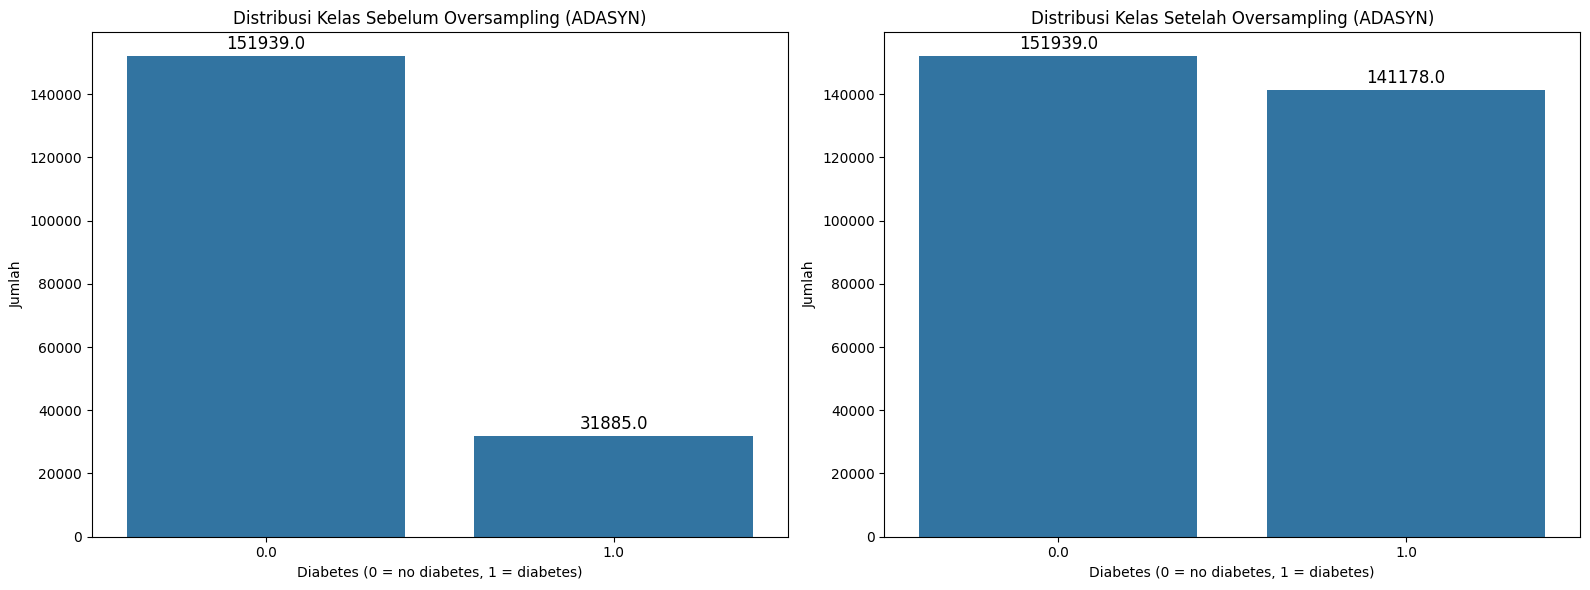

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN

# Menggunakan ADASYN untuk oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Membuat figure dan axes untuk menampilkan dua plot dalam satu gambar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Menampilkan distribusi kelas sebelum oversampling pada subplot pertama
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribusi Kelas Sebelum Oversampling (ADASYN)')
axes[0].set_xlabel('Diabetes (0 = no diabetes, 1 = diabetes)')
axes[0].set_ylabel('Jumlah')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Melakukan oversampling dengan ADASYN pada data training
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

print(f"Jumlah data setelah oversampling (ADASYN): {X_train_adasyn.shape[0]}")

# Menampilkan distribusi kelas setelah oversampling pada subplot kedua
sns.countplot(x=y_train_adasyn, ax=axes[1])
axes[1].set_title('Distribusi Kelas Setelah Oversampling (ADASYN)')
axes[1].set_xlabel('Diabetes (0 = no diabetes, 1 = diabetes)')
axes[1].set_ylabel('Jumlah')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Menampilkan gambar
plt.tight_layout()
plt.show()

## Random Forest + ADASYN

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Membuat model RandomForest
rf_model_adasyn = RandomForestClassifier(random_state=42)

# Melatih model dengan data training yang sudah di-oversampling menggunakan ADASYN
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Melakukan prediksi dengan data testing
rf_pred_adasyn = rf_model_adasyn.predict(X_test_scaled)

# Menghitung akurasi
rf_accuracy_adasyn = accuracy_score(y_test, rf_pred_adasyn)

# Menghitung precision, recall, dan F1-score
rf_precision_adasyn = precision_score(y_test, rf_pred_adasyn)
rf_recall_adasyn = recall_score(y_test, rf_pred_adasyn)
rf_f1_adasyn = f1_score(y_test, rf_pred_adasyn)

# Confusion Matrix
conf_matrix_adasyn = confusion_matrix(y_test, rf_pred_adasyn)
print("Confusion Matrix (Random Forest setelah ADASYN):")
print(conf_matrix_adasyn)

# Menghitung specificity
TN = conf_matrix_adasyn[0, 0]  # True Negative
FP = conf_matrix_adasyn[0, 1]  # False Positive
rf_specificity_adasyn = TN / (TN + FP)

# Menampilkan hasil
print(f"\nAkurasi Random Forest (setelah ADASYN): {rf_accuracy_adasyn:.4f}")
print(f"Precision (Random Forest setelah ADASYN): {rf_precision_adasyn:.4f}")
print(f"Recall (Random Forest setelah ADASYN): {rf_recall_adasyn:.4f}")
print(f"F1-Score (Random Forest setelah ADASYN): {rf_f1_adasyn:.4f}")
print(f"Specificity (Random Forest setelah ADASYN): {rf_specificity_adasyn:.4f}")

# Menampilkan classification report
print("\nClassification Report (Random Forest setelah ADASYN):")
print(classification_report(y_test, rf_pred_adasyn))

Confusion Matrix (Random Forest setelah ADASYN):
[[35149  2967]
 [ 5481  2360]]

Akurasi Random Forest (setelah ADASYN): 0.8162
Precision (Random Forest setelah ADASYN): 0.4430
Recall (Random Forest setelah ADASYN): 0.3010
F1-Score (Random Forest setelah ADASYN): 0.3584
Specificity (Random Forest setelah ADASYN): 0.9222

Classification Report (Random Forest setelah ADASYN):
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     38116
         1.0       0.44      0.30      0.36      7841

    accuracy                           0.82     45957
   macro avg       0.65      0.61      0.63     45957
weighted avg       0.79      0.82      0.80     45957



## XGBoost + ADASYN

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Membuat model XGBoost
xgb_model_adasyn = xgb.XGBClassifier(random_state=42)

# Melatih model dengan data training yang sudah di-oversampling menggunakan ADASYN
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Melakukan prediksi dengan data testing
xgb_pred_adasyn = xgb_model_adasyn.predict(X_test_scaled)

# Menghitung akurasi
xgb_accuracy_adasyn = accuracy_score(y_test, xgb_pred_adasyn)

# Menghitung precision, recall, dan F1-score
xgb_precision_adasyn = precision_score(y_test, xgb_pred_adasyn)
xgb_recall_adasyn = recall_score(y_test, xgb_pred_adasyn)
xgb_f1_adasyn = f1_score(y_test, xgb_pred_adasyn)

# Confusion Matrix
conf_matrix_adasyn = confusion_matrix(y_test, xgb_pred_adasyn)
print("Confusion Matrix (XGBoost setelah ADASYN):")
print(conf_matrix_adasyn)

# Menghitung specificity
TN = conf_matrix_adasyn[0, 0]  # True Negative
FP = conf_matrix_adasyn[0, 1]  # False Positive
xgb_specificity_adasyn = TN / (TN + FP)

# Menampilkan hasil
print(f"\nAkurasi XGBoost (setelah ADASYN): {xgb_accuracy_adasyn:.4f}")
print(f"Precision (XGBoost setelah ADASYN): {xgb_precision_adasyn:.4f}")
print(f"Recall (XGBoost setelah ADASYN): {xgb_recall_adasyn:.4f}")
print(f"F1-Score (XGBoost setelah ADASYN): {xgb_f1_adasyn:.4f}")
print(f"Specificity (XGBoost setelah ADASYN): {xgb_specificity_adasyn:.4f}")

# Menampilkan classification report
print("\nClassification Report (XGBoost setelah ADASYN):")
print(classification_report(y_test, xgb_pred_adasyn))

Confusion Matrix (XGBoost setelah ADASYN):
[[36713  1403]
 [ 6122  1719]]

Akurasi XGBoost (setelah ADASYN): 0.8363
Precision (XGBoost setelah ADASYN): 0.5506
Recall (XGBoost setelah ADASYN): 0.2192
F1-Score (XGBoost setelah ADASYN): 0.3136
Specificity (XGBoost setelah ADASYN): 0.9632

Classification Report (XGBoost setelah ADASYN):
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38116
         1.0       0.55      0.22      0.31      7841

    accuracy                           0.84     45957
   macro avg       0.70      0.59      0.61     45957
weighted avg       0.80      0.84      0.81     45957



## Stacking + ADASYN

In [19]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Definisi base model dengan dua parameter tambahan masing-masing
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42))
]

# Definisi meta model
meta_model = LogisticRegression()

# Definisi StackingClassifier
stacking_model_adasyn = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Melatih model dengan data yang telah dioversample menggunakan SMOTE
stacking_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Prediksi pada data uji
y_pred_stacking_adasyn = stacking_model_adasyn.predict(X_test_scaled)

# Evaluasi model Stacking
accuracy_stacking_adasyn = accuracy_score(y_test, y_pred_stacking_adasyn)
precision_stacking_adasyn = precision_score(y_test, y_pred_stacking_adasyn)
recall_stacking_adasyn = recall_score(y_test, y_pred_stacking_adasyn)
f1_stacking_adasyn = f1_score(y_test, y_pred_stacking_adasyn)

# Confusion matrix Stacking
cm_stacking_adasyn = confusion_matrix(y_test, y_pred_stacking_adasyn)
tn, fp, fn, tp = cm_stacking_adasyn.ravel()

# Calculate specificity
specificity_stacking_adasyn = tn / (tn + fp)

# Print evaluasi Stacking dengan 6 digit desimal
print("\nEvaluasi Model Stacking (SMOTE):")
print(f"Akurasi     : {accuracy_stacking_adasyn:.6f}")
print(f"Precision   : {precision_stacking_adasyn:.6f}")
print(f"Recall      : {recall_stacking_adasyn:.6f}")
print(f"F1-score    : {f1_stacking_adasyn:.6f}")
print(f"Specificity : {specificity_stacking_adasyn:.6f}")

# Classification report Stacking
print("\nClassification Report Stacking (SMOTE):")
print(classification_report(y_test, y_pred_stacking_adasyn))

# Confusion matrix Stacking
print("\nConfusion Matrix Stacking (SMOTE):")
print(cm_stacking_adasyn)



Evaluasi Model Stacking (SMOTE):
Akurasi     : 0.811454
Precision   : 0.436321
Recall      : 0.360031
F1-score    : 0.394522
Specificity : 0.904318

Classification Report Stacking (SMOTE):
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     38116
         1.0       0.44      0.36      0.39      7841

    accuracy                           0.81     45957
   macro avg       0.65      0.63      0.64     45957
weighted avg       0.80      0.81      0.80     45957


Confusion Matrix Stacking (SMOTE):
[[34469  3647]
 [ 5018  2823]]


# Model + Random Oversampling

## Oversampling ROS

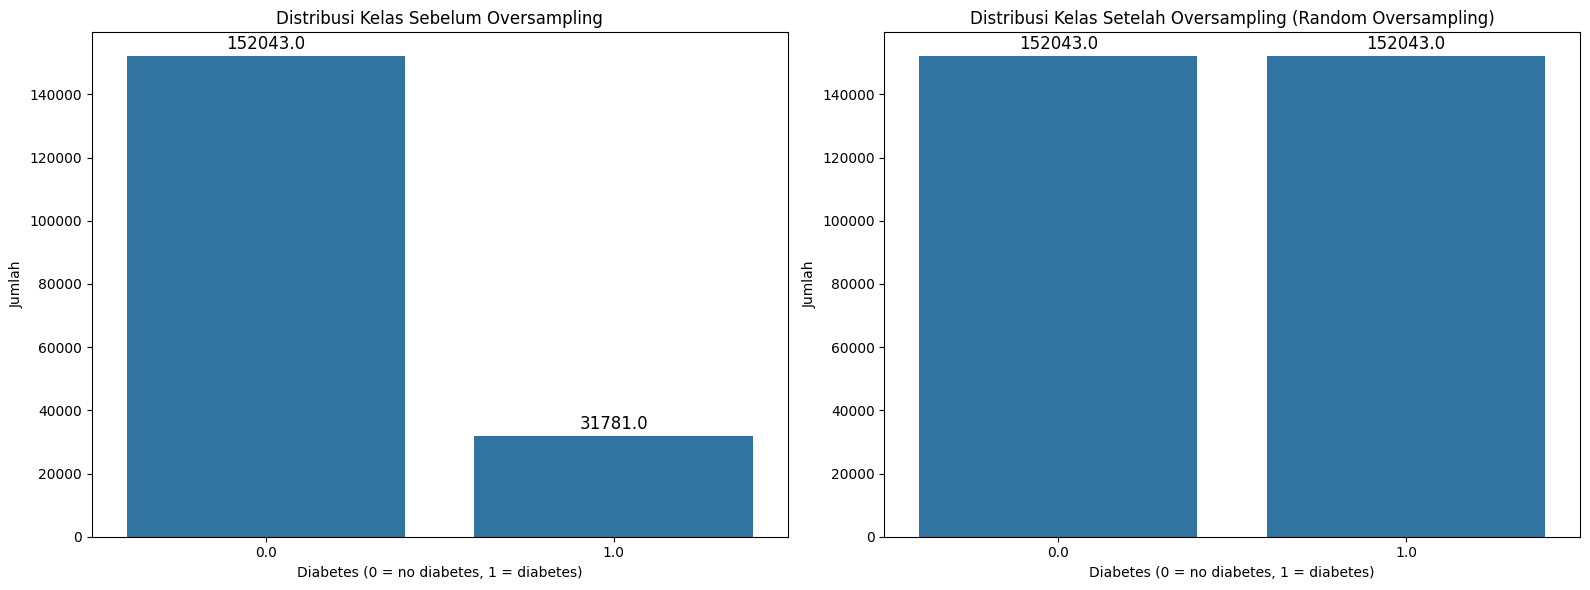

Jumlah data setelah oversampling (Random Oversampling): 304086


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Menampilkan distribusi kelas sebelum oversampling
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribusi Kelas Sebelum Oversampling')
axes[0].set_xlabel('Diabetes (0 = no diabetes, 1 = diabetes)')
axes[0].set_ylabel('Jumlah')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Oversampling dengan Random Oversampling
ros = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

# Menampilkan distribusi kelas setelah oversampling
sns.countplot(x=y_train_ros, ax=axes[1])
axes[1].set_title('Distribusi Kelas Setelah Oversampling (Random Oversampling)')
axes[1].set_xlabel('Diabetes (0 = no diabetes, 1 = diabetes)')
axes[1].set_ylabel('Jumlah')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

print(f"Jumlah data setelah oversampling (Random Oversampling): {X_train_ros.shape[0]}")


## Random Forest + ROS

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Membuat model RandomForest
rf_model_ros = RandomForestClassifier(random_state=42)

# Melatih model dengan data yang sudah di-oversampling menggunakan Random Oversampling
rf_model_ros.fit(X_train_ros, y_train_ros)

# Melakukan prediksi dengan data testing
rf_pred_ros = rf_model_ros.predict(X_test_scaled)

# Menghitung akurasi
rf_accuracy_ros = accuracy_score(y_test, rf_pred_ros)

# Menghitung precision, recall, dan F1-score
rf_precision_ros = precision_score(y_test, rf_pred_ros)
rf_recall_ros = recall_score(y_test, rf_pred_ros)
rf_f1_ros = f1_score(y_test, rf_pred_ros)

# Confusion Matrix
conf_matrix_ros = confusion_matrix(y_test, rf_pred_ros)
print("Confusion Matrix (Random Forest setelah Random Oversampling):")
print(conf_matrix_ros)

# Menghitung specificity
TN = conf_matrix_ros[0, 0]  # True Negative
FP = conf_matrix_ros[0, 1]  # False Positive
rf_specificity_ros = TN / (TN + FP)

# Menampilkan hasil
print(f"\nAkurasi Random Forest (setelah Random Oversampling): {rf_accuracy_ros:.4f}")
print(f"Precision (Random Forest setelah Random Oversampling): {rf_precision_ros:.4f}")
print(f"Recall (Random Forest setelah Random Oversampling): {rf_recall_ros:.4f}")
print(f"F1-Score (Random Forest setelah Random Oversampling): {rf_f1_ros:.4f}")
print(f"Specificity (Random Forest setelah Random Oversampling): {rf_specificity_ros:.4f}")

# Menampilkan classification report
print("\nClassification Report (Random Forest setelah Random Oversampling):")
print(classification_report(y_test, rf_pred_ros))


Confusion Matrix (Random Forest setelah Random Oversampling):
[[36491  1521]
 [ 7611   334]]

Akurasi Random Forest (setelah Random Oversampling): 0.8013
Precision (Random Forest setelah Random Oversampling): 0.1801
Recall (Random Forest setelah Random Oversampling): 0.0420
F1-Score (Random Forest setelah Random Oversampling): 0.0682
Specificity (Random Forest setelah Random Oversampling): 0.9600

Classification Report (Random Forest setelah Random Oversampling):
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     38012
         1.0       0.18      0.04      0.07      7945

    accuracy                           0.80     45957
   macro avg       0.50      0.50      0.48     45957
weighted avg       0.72      0.80      0.75     45957



## XGBoost + ROS

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Membuat model XGBoost
xgb_model_ros = xgb.XGBClassifier(random_state=42)

# Melatih model dengan data yang sudah di-oversampling menggunakan Random Oversampling
xgb_model_ros.fit(X_train_ros, y_train_ros)

# Melakukan prediksi dengan data testing
xgb_pred_ros = xgb_model_ros.predict(X_test_scaled)

# Menghitung akurasi
xgb_accuracy_ros = accuracy_score(y_test, xgb_pred_ros)

# Menghitung precision, recall, dan F1-score
xgb_precision_ros = precision_score(y_test, xgb_pred_ros)
xgb_recall_ros = recall_score(y_test, xgb_pred_ros)
xgb_f1_ros = f1_score(y_test, xgb_pred_ros)

# Confusion Matrix
conf_matrix_ros = confusion_matrix(y_test, xgb_pred_ros)
print("Confusion Matrix (XGBoost setelah Random Oversampling):")
print(conf_matrix_ros)

# Menghitung specificity
TN = conf_matrix_ros[0, 0]  # True Negative
FP = conf_matrix_ros[0, 1]  # False Positive
xgb_specificity_ros = TN / (TN + FP)

# Menampilkan hasil
print(f"\nAkurasi XGBoost (setelah Random Oversampling): {xgb_accuracy_ros:.4f}")
print(f"Precision (XGBoost setelah Random Oversampling): {xgb_precision_ros:.4f}")
print(f"Recall (XGBoost setelah Random Oversampling): {xgb_recall_ros:.4f}")
print(f"F1-Score (XGBoost setelah Random Oversampling): {xgb_f1_ros:.4f}")
print(f"Specificity (XGBoost setelah Random Oversampling): {xgb_specificity_ros:.4f}")

# Menampilkan classification report
print("\nClassification Report (XGBoost setelah Random Oversampling):")
print(classification_report(y_test, xgb_pred_ros))


Confusion Matrix (XGBoost setelah Random Oversampling):
[[22398 15614]
 [ 4662  3283]]

Akurasi XGBoost (setelah Random Oversampling): 0.5588
Precision (XGBoost setelah Random Oversampling): 0.1737
Recall (XGBoost setelah Random Oversampling): 0.4132
F1-Score (XGBoost setelah Random Oversampling): 0.2446
Specificity (XGBoost setelah Random Oversampling): 0.5892

Classification Report (XGBoost setelah Random Oversampling):
              precision    recall  f1-score   support

         0.0       0.83      0.59      0.69     38012
         1.0       0.17      0.41      0.24      7945

    accuracy                           0.56     45957
   macro avg       0.50      0.50      0.47     45957
weighted avg       0.71      0.56      0.61     45957



## Stacking + ROS

In [27]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Definisi base model dengan dua parameter tambahan masing-masing
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42))
]

# Definisi meta model
meta_model = LogisticRegression()

# Definisi StackingClassifier
stacking_model_ros = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Melatih model dengan data yang telah dioversample menggunakan SMOTE
stacking_model_ros.fit(X_train_ros, y_train_ros)

# Prediksi pada data uji
y_pred_stacking_ros = stacking_model_ros.predict(X_test_scaled)

# Evaluasi model Stacking
accuracy_stacking_ros = accuracy_score(y_test, y_pred_stacking_ros)
precision_stacking_ros = precision_score(y_test, y_pred_stacking_ros)
recall_stacking_ros = recall_score(y_test, y_pred_stacking_ros)
f1_stacking_ros = f1_score(y_test, y_pred_stacking_ros)

# Confusion matrix Stacking
cm_stacking_ros = confusion_matrix(y_test, y_pred_stacking_ros)
tn, fp, fn, tp = cm_stacking_ros.ravel()

# Calculate specificity
specificity_stacking_ros = tn / (tn + fp)

# Print evaluasi Stacking dengan 6 digit desimal
print("\nEvaluasi Model Stacking (SMOTE):")
print(f"Akurasi     : {accuracy_stacking_ros:.6f}")
print(f"Precision   : {precision_stacking_ros:.6f}")
print(f"Recall      : {recall_stacking_ros:.6f}")
print(f"F1-score    : {f1_stacking_ros:.6f}")
print(f"Specificity : {specificity_stacking_ros:.6f}")

# Classification report Stacking
print("\nClassification Report Stacking (SMOTE):")
print(classification_report(y_test, y_pred_stacking_ros))

# Confusion matrix Stacking
print("\nConfusion Matrix Stacking (SMOTE):")
print(cm_stacking_ros)



Evaluasi Model Stacking (SMOTE):
Akurasi     : 0.818352
Precision   : 0.175523
Recall      : 0.013719
F1-score    : 0.025449
Specificity : 0.986531

Classification Report Stacking (SMOTE):
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90     38012
         1.0       0.18      0.01      0.03      7945

    accuracy                           0.82     45957
   macro avg       0.50      0.50      0.46     45957
weighted avg       0.71      0.82      0.75     45957


Confusion Matrix Stacking (SMOTE):
[[37500   512]
 [ 7836   109]]
